<DIV ALIGN=CENTER>

# Text Mining Exercise Notebook (Solutions)
## Professor Robert J. Brunner
  
</DIV>  
-----
-----


## Introduction

In this IPython Notebook, you are presented with the task of classifying
Movie Reviews. We will use a public [movie review][pmr] data set. For
convenience, the data has already been pre-cached and processed into two
files, one for training and the other for testing. The data were pickled
by using the following commands (assuming the files were correctly
opened):

```python
import pickle

pickle.dump(train_data, open(path + 'train_m.p', 'wb'))
pickle.dump(test_data, open(path + 'test_m.p', 'wb'))
```

In this Notebook, you will first read in these data, before conducting
basic exploratory data analysis. Next, you will begin text mining these
data, before finally building text classifiers and evaluating their
performance.

-----
[pmr]: http://www.cs.cornell.edu/people/pabo/movie-review-data/review_polarity.tar.gz

## Task 1

First, you need to read the data into the notebook. Specifically, you
want to read (or more correctly _unpickle_)the training data into a
variable called `train` and the testing data into a variable called
`test`. Next, explore the data, and answer the following questions:

1. What are data structures that hold the _training_ and _testing_ data?

3. How can you access the _data_ and _labels_ from the _training_ and
_testing_ data?

2. How many entries are there in the _training_ and _testing_ data?


-----

In [1]:
# unpickle the training and testing data.
import pickle

with open('/home/data_scientist/data/train_m.p', 'rb') as fin:
    train = pickle.load(fin)

with open('/home/data_scientist/data/test_m.p', 'rb') as fin:
    test = pickle.load(fin)

In [2]:
# Display the type of the training and testing data

print("Data Type of training samples = {0}".format(type(train)))
print("Data Type of testing samples  = {0}".format(type(test)))

Data Type of training samples = <class 'dict'>
Data Type of testing samples  = <class 'dict'>


In [3]:
print("Training data keys = {0}".format(train.keys()))
print("Testing data keys = {0}".format(test.keys()))

Training data keys = dict_keys(['target', 'data'])
Testing data keys = dict_keys(['target', 'data'])


In [4]:
print("Number of training samples = {0}".format(len(train['data'])))
print("Number of testing samples  = {0}".format(len(test['data'])))

Number of training samples = 1500
Number of testing samples  = 500


## Task 2

Now that you have the data loaded into the Notebook, and you can access
the data and labels, the next step is to tokenize the textual data. For
this you can use the `CountVectorizer`. In the second task, you should
properly create a `CountVectorizer` that uses English _stop words_. You
also should use this text tokenizer to **fit** and **transform** the
_training_ data, and to **transform** the _testing_ data so that we can
apply and evaluate a classifier in the third step. After these steps are
completed, explore the vectorizer to answer these questions:

1. How many tokens were produced?

1. Is _reboot_ in the list of word tokens?

1. Is _fantasy_ in the list of word tokens?

-----

In [5]:
# Create a CountVectorizer to tokenize the reviews

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words = 'english')
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])


In [6]:
# Display number of words in vocabulary

words = cv.vocabulary_

print("Number of words in vocabulary = {0}".format(len(words)))

Number of words in vocabulary = 35015


In [7]:
# Test if 'reboot' is in the vocabulary

my_word = u'reboot'

if my_word in words:
    print("{0} is in the vocabulary".format(my_word))
else:
    print("{0} is NOT in the vocabulary".format(my_word))



reboot is NOT in the vocabulary


In [8]:
# Test if 'fantasy' is in the vocabulary

my_word = u'fantasy'

if my_word in words:
    print("{0} is in the vocbulary".format(my_word))
else:
    print("{0} is NOT in the vocbulary".format(my_word))

fantasy is in the vocbulary


## Task 3

Now, given a vocabulary, we can first train a classifier, and second,
apply the classifier to our test data. Your third task is to train a
simple Naive Bayes classifier on the training data and apply this
classifier to the test data. After these steps are completed, explore
the vectorizer to answer these questions:

1. What is your accuracy (compute this by using the `score` method to
compare the predicted and actual labels for the test data.)?

2. If you limit the vocabulary to 5,000 words, what is your
classification accuracy?

3. If you don't limit the vocabulary, but do include bigrams, what is
your classification accuracy?

-----

In [9]:
# Perform simple Naive Bayesian classification, and display prediction accuracy.

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB prediction accuracy =  79.6%


In [10]:
# Perform simple Naive Bayesian classificaiton limiting features to 5,000 words, 
# and display prediction accuracy.

cv = CountVectorizer(stop_words = 'english', max_features=5000)
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB (MF) prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB (MF) prediction accuracy =  80.8%


In [11]:
# Perform simple Naive Bayesian classificaiton, including bi-grams, 
# and display prediction accuracy.

cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2))
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

clf = MultinomialNB().fit(train_counts, train['target'])

predicted = clf.predict(test_data)

print("NB (BiGrams) prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB (BiGrams) prediction accuracy =  81.4%


## Task 4

One problem with simply counting word occurrences is that possibly
important words can be down-weighted since they might appear
infrequently. The standard approach to compensating for this is to
employ TF-IDF. Your next task is to integrate TF-IDF into your
classification process. First, you need to construct a vocabulary that
consists of words and bigrams with a limit of 10,000 for the maximum
number of features. Next create a `TfidfTransformer` to fit and
transform this new TF-IDF restricted vocabulary. Finally, apply a Naive
Bayes classifier.

After these steps are completed, explore the answer to these questions:

1. What is your classification accuracy? Why is it different?

2. If you change the classifier to `LogisticRegression`, what is your
classification accuracy? Why did the result change?

-----

In [12]:
# Use TF-IDF to classify based on frequencies, not occurances

from sklearn.feature_extraction.text import TfidfTransformer

cv = CountVectorizer(stop_words = 'english', ngram_range=(1,2), max_features=10000)
train_counts = cv.fit_transform(train['data'])
test_data = cv.transform(test['data'])

tfidf_transformer = TfidfTransformer()
train_tfidf = tfidf_transformer.fit_transform(train_counts)

clf = MultinomialNB().fit(train_tfidf, train['target'])

predicted = clf.predict(tfidf_transformer.transform(test_data))

print("NB TF-IDF prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

NB TF-IDF prediction accuracy =  79.0%


In [13]:
# Use a Logistic Regression model to classify the TF-IDF data.

from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C=1000).fit(train_tfidf, train['target'])

predicted = clf.predict(test_data)
print("LR TF-IDF prediction accuracy = {0:5.1f}%".format(100.0 * clf.score(test_data, test['target'])))

LR TF-IDF prediction accuracy =  83.8%


## Task 5

In the course Notebooks, we display the confusion matrix as a heat map.
In this final task, first modify the course code to display the
confusion matrix for this particular text data mining challenge. You
should also change the figure size appropriately.

-----

In [14]:
%matplotlib inline

# Course function, with two minor modifications (one of which is figsize)

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white", context='paper', font='monospace')

# Convenience function to plot confusion matrix

# This method produces a colored heatmap that displays the relationship
# between predicted and actual types from a machine leanring method.

def confusion(test, predict, title):

    f, ax = plt.subplots(figsize=(6, 4))

    # Make a 2D histogram from the test and result arrays
    pts, xe, ye = np.histogram2d(test, predict, bins=2)

    # For simplicity we create a new DataFrame
    pd_pts = pd.DataFrame(pts.astype(int))
    
    # Display heatmap and add decorations
    hm = sns.heatmap(pd_pts, annot=True, fmt="d")
    hm.axes.set_title(title)
    
    return None

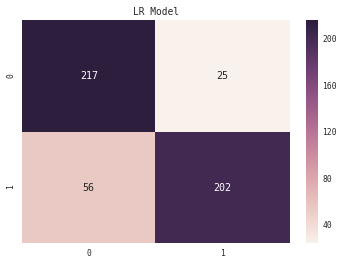

In [15]:
# Display confusion matrix for final classification example

confusion(test['target'], predicted, 'LR Model')

### Return to the [Week 4 Index](index.ipynb).

-----